# Riskified
## Coding Exercise (in Python)

##### Author: Chris Wang  

The purpose of this notebook is to answer the following questions about the provided data set, "Analyst_Coding_Test_(1).csv":
1. Draw a boxplot showing the area size distribution for each shape.
2. Calculate the mean, max, and standard deviation of the area size of each color.
3. What is the average area size of a yellow square?
4. Which shape is most likely to be green?
5. Given the fact the the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?
6. Write a function that calculates the side or radios of an object, depending on the shape and area of the object [for an Equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].
7. Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radios).
8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?
9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.
10. Create a dataframe, table or list that show for each shape:
          a. The proportion of red objects within the shape
          b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).
11. Create a function that calculates 10. b. for a given shape and color.

----
----

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import os
%matplotlib inline

import math

In [2]:
# Read in data
data = pd.read_csv('Analyst_Coding_Test_(1).csv')

Provided details:
1. shape - square, triangle (equilateral) or circle
2. color - blue, red, green or yellow
3. area - area size in square inches

In [3]:
data.describe(include = 'all')

,shape,color,area
count,1000,1000,1000.000000
unique,3,4,NaN
top,square,blue,NaN
freq,477,360,NaN
mean,NaN,NaN,3945.289900
std,NaN,NaN,4754.205318
min,NaN,NaN,0.800000
25%,NaN,NaN,758.250000
50%,NaN,NaN,2610.800000
75%,NaN,NaN,5492.450000


In [4]:
print(data.isna().sum())

shape    0
color    0
area     0
dtype: int64


## 1. Draw a boxplot showing the area size distribution for each shape.

Text(0.5, 1.0, 'Areas of Shapes')

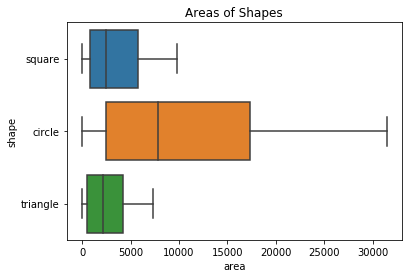

In [5]:
sns.boxplot(x='area', y='shape', data = data).set_title('Areas of Shapes')

## 2. Calculate the mean, max, and standard deviation of the area size of each color.

In [6]:
byColor = data.groupby(by='color')
byColor_describe = byColor.agg({'area':['mean', 'max', 'std']})
byColor_describe

area                      
               mean      max          std
color                                    
blue    3208.131667  21642.4  3039.212965
green   5761.119231  27759.1  6695.029606
red     3815.871034  31415.9  5092.678377
yellow  4538.208088  31415.9  5352.460578

## 3. What is the average area size of a yellow square?

In [7]:
avgArea_yellowSquare = round(data[(data['color'] == 'yellow') & (data['shape'] == 'square')]['area'].mean(),2)
print('The average area of the yellow squares is: ' + str(avgArea_yellowSquare))

The average area of the yellow squares is: 3333.21


## 4. Which shape is most likely to be green?
(Interpreted as: Which shape has the highest chance of being green?)

In [8]:
# calculate total count per shape
byShape = data.groupby(by='shape')
byShape_count = byShape.agg({'area':'count'})
byShape_count.rename(columns={'area':'total'}, inplace=True)

# calculate count per shape, per color
byShapeColor = data.groupby(by=['shape','color'])
byShapeColor_count = byShapeColor.agg({'area':'count'})
byShapeColor_count.rename(columns={'area':'count'}, inplace=True)

# join and calculate proportion of colors per shape
byShapeColor_count = byShapeColor_count.join(byShape_count, on='shape')
byShapeColor_count['% of Total'] = byShapeColor_count['count'] / byShapeColor_count['total']

# extract the shape with highest proportion of greens
byShapeColor_count.reset_index(inplace=True)
greens = byShapeColor_count[byShapeColor_count['color'] == 'green']
greens.sort_values(by='% of Total', ascending = False)

# print
greenShape = greens['shape'].iloc[0]
greenChance = round(greens['% of Total'].iloc[0] * 100,2)
print('The ' + greenShape + ' has the highest chance of being green with a chance of: ' + \
     str(greenChance) + '%.')

The circle has the highest chance of being green with a chance of: 25.83%.


# 5. Given the fact the the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?

In [9]:
# filter for red objects with area larger than 3,000 sq. inches
largeRed = data[(data['area'] > 3000) & (data['color'] == 'red')]

# count total objects
largeRed_total = largeRed['area'].count()

# group by shape
largeRed_byShape = largeRed.groupby(by='shape').agg({'area':'count'})
largeRed_byShape.rename(columns={'area':'count'}, inplace=True)

# calculate chances of each shape
largeRed_byShape['% of Total'] = largeRed_byShape['count'] / largeRed_total * 100

# print
largeRed_byShape.drop('count', axis=1,inplace=True)
largeRed_byShape

,% of Total
shape,
circle,16.0
square,16.8
triangle,67.2


## 6. Write a function that calculates the side or radios of an object, depending on the shape and area of the object [for an Equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].

In [10]:
def getSide(shape, area):
    # input: shape and area
    # output: length of side if square or equilateral triangle; length of radius if circle
    
    if (area < 0):
        return('Invalid area')
    
    if shape == 'square':
        return math.sqrt(area)
    elif shape == 'circle':
        return math.sqrt(area/math.pi)
    elif shape == 'triangle':
        return math.sqrt((area * 4) / math.sqrt(3))
    else:
        return('Unknown shape')

## 7. Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radios)
(Interpreting as: provide side length for square and triangle, radius for circle)

In [11]:
data['side'] = data.apply(lambda x: round(getSide(x['shape'],x['area'])), axis=1)
data.head(10)

,shape,color,area,side
0,square,yellow,9409.0,97
1,circle,yellow,4071.5,36
2,triangle,blue,2028.0,68
3,square,blue,3025.0,55
4,square,blue,9216.0,96
5,square,yellow,4356.0,66
6,circle,yellow,78.5,5
7,triangle,red,4563.0,103
8,square,yellow,1156.0,34
9,triangle,red,5043.0,108


## 8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?

Text(0.5, 1.0, 'Side Length of Shapes')

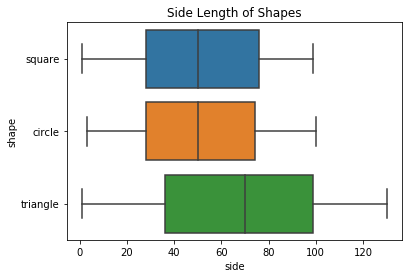

In [12]:
sns.boxplot(x='side', y='shape', data = data).set_title('Side Length of Shapes')

Based on the above plot, I can infer the following pertaining to shape side sizes:
1. the shape with the largest range, interquartile range, median, and maximum is the circle
2. the distributions of the squares and circles skew slightly toward the larger side whereas the triangles skew slightly toward the smaller side (i.e. the smaller sides of squares tend to be closer than the larger sides and the same for circles)
3. the minimums for all three shapes are similar, hovering around zero
4. on average, the largest shape is the circle and the smallest shape is the square
5. squares have the smallest distribution as well as smallest interquartile range and, therefore, the least amount of variability
6. there do not appear to be any outliers for any shapes

More technically speaking:
1. 50% of all squares have a side length of between approx. 25 inches to 75 inches
2. 50% of all circles have a side length of between approx. 50 inches to 90 inches
3. 50% of all circles have a side length of between approx. 35 inches to 100 inches

I would also be able to deduce that, given an object with an area larger than approx. 130 inches, that object is a circle.

## 9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.

Text(0.5, 1.0, 'Area vs Side of Shapes')

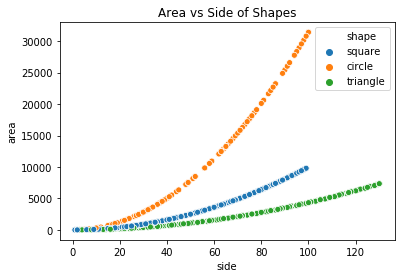

In [13]:
sns.scatterplot(x='side', y='area', data=data, hue='shape').set_title('Area vs Side of Shapes')

## 10. Create a dataframe, table or list that show for each shape:  
  a. The proportion of red objects within the shape  
  b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).  

In [14]:
# total count of red shapes per shape
red = data[data['color'] == 'red']
red_count = red.groupby(by='shape')['area'].agg('count')

# total sum area of blue shapes per shape
blue = data[data['color'] == 'blue']
blue_sum = blue.groupby(by='shape')['area'].agg('sum')

# total count and sum of areas by shape
byShape_countSum = byShape.agg({'area':['count','sum']})
byShape_countSum.columns = byShape_countSum.columns.droplevel()

# join all data
byShape_countSum_red_blue = byShape_countSum.merge(red_count, on='shape').merge(blue_sum, on='shape')

# calculate proportions
byShape_countSum_red_blue['Proportion of red objects'] = byShape_countSum_red_blue['area_x'] / byShape_countSum_red_blue['count']
byShape_countSum_red_blue['Proportion of blue area'] = byShape_countSum_red_blue['area_y'] / byShape_countSum_red_blue['sum']

# trim irrelevant columns
byShape_countSum_red_blue = byShape_countSum_red_blue[['Proportion of red objects', 'Proportion of blue area']]
byShape_countSum_red_blue

,Proportion of red objects,Proportion of blue area
shape,,
circle,0.250000,0.061246
square,0.117400,0.360385
triangle,0.506203,0.473886


## 11. Create a function that calculates 10. b. for a given shape and color.

In [15]:
def colorAreaProportion(df, shape, color):
    # inputs: dataframe of shapes, colors, and areas; shape; color
    # outputs: proportion of area of provided colored shape out of total area of provided shape
    
    # input validation
    error = False
    msg = ''
    if shape not in df['shape'].unique(): 
        error = True
        msg += 'Invalid shape. '
    if color not in df['color'].unique(): 
        error = True
        msg += 'Invalid color. '    
    
    if error:
        return msg
    
    # sum areas of given shape
    data = df[df['shape'] == shape]
    total = data['area'].sum()
    
    # sum areas of given shape and color
    data_color = data[data['color'] == color]
    area = data_color['area'].sum()
    
    return (area / total)

In [16]:
# test
print(colorAreaProportion(data, 'other', 'other'))
print(colorAreaProportion(data, 'circle', 'other'))
print(colorAreaProportion(data, 'triangle', 'blue'))

Invalid shape. Invalid color. 
Invalid color. 
0.4738855857023727
